# Custom modules

In [1]:
import os
import sys
lib_src = '\\Users\\mauricio\\gdrive\\python\\machine-learning'
sys.path.insert(1, lib_src)
from size import size

# Standard modules

In [2]:
import psutil
import numpy as np
from time import time
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import PolynomialFeatures

# Fit dense matrix shapes in memory

In [3]:
from matrix.npinfo import npinfo
from matrix.dense_shape_from_memory import dense_shape_from_memory

In [4]:
newshape, memory = dense_shape_from_memory(0.5, 'uint8')
print(newshape, size(memory))

(83143, 83143) 6.4 GiB


In [5]:
newshape, memory = dense_shape_from_memory(0.5, 'uint8', rows=1)
print(newshape, size(memory))

(1, 6910130176) 6.4 GiB


In [6]:
newshape, memory = dense_shape_from_memory(0.5, 'uint8', cols=1)
print(newshape, size(memory))

(6910097408, 1) 6.4 GiB


In [7]:
newshape, memory = dense_shape_from_memory(0.5, 'uint8', cols=3728)
print(newshape, size(memory))

(1854442, 3728) 6.4 GiB


In [8]:
interactions = lambda x: int((x*(x+1))/2)
newshape, memory = dense_shape_from_memory(0.5, 'uint8', cols=interactions(3728))
print(newshape, size(memory))

(994, 6950856) 6.4 GiB


# Dense matrix examples

Functions to build a integer matrices and report statistics

In [4]:
from matrix.dense_matrix import dense_matrix
from matrix.dense_matrix_report import dense_matrix_report

100x100, 50% sparse, random uniform

Dimensions         : (100, 100)
Number of non-zeros: 5000
Sparsity           : 0.5
Data type          : uint8
Size               : 9.8 KiB
[[0 0 0 ... 0 3 0]
 [0 1 1 ... 1 6 6]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [2 0 0 ... 5 0 3]
 [2 1 0 ... 0 0 0]]


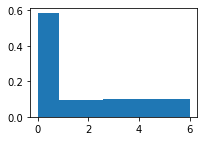

In [11]:
m = dense_matrix(low=1, high=7, size=(100, 100), sparsity=1/2, p=None, dtype='uint8')
dense_matrix_report(m)
plt.figure(figsize=(3,2));plt.hist(m.reshape(-1), bins=7, density=True);plt.show()

100x100, 50% sparse, random non-uniform decreasing probabilities

Decreasing probabilities:
 [0.2857142857142857, 0.23809523809523808, 0.19047619047619047, 0.14285714285714285, 0.09523809523809523, 0.047619047619047616]
Dimensions         : (100, 100)
Number of non-zeros: 5000
Sparsity           : 0.5
Data type          : uint8
Size               : 9.8 KiB
[[1 2 2 ... 0 1 0]
 [2 6 0 ... 0 2 0]
 [0 0 0 ... 4 0 3]
 ...
 [0 1 5 ... 0 2 1]
 [0 6 1 ... 0 0 3]
 [2 0 4 ... 0 1 5]]


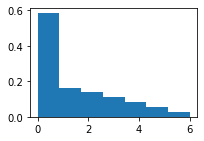

In [12]:
decreasing_probs = [(7-x) / sum(range(1, 7)) for x in range(1, 7)]
print('Decreasing probabilities:\n', decreasing_probs)
m = dense_matrix(low=1, high=7, size=(100, 100), sparsity=1/2, p=decreasing_probs, dtype='uint8')
dense_matrix_report(m)
plt.figure(figsize=(3,2));plt.hist(m.reshape(-1), bins=7, density=True);plt.show()

400277x3728, 99% sparse, random non-uniform custom probabilities

In [13]:
other_probs = [0.812498251379185, 0.15335166099901568, 0.02708009573539997, 0.00565472178489039, 0.001220537328921298, 0.0001947327725877299]
m = dense_matrix(low=1, high=7, size=(400277, 3728), sparsity=0.5, p=other_probs, dtype='uint8')
dense_matrix_report(m)

Dimensions         : (400277, 3728)
Number of non-zeros: 746116328
Sparsity           : 0.5
Data type          : uint8
Size               : 1.4 GiB
[[0 1 1 ... 0 1 0]
 [0 1 1 ... 0 2 0]
 [1 1 1 ... 0 0 1]
 ...
 [0 0 1 ... 0 0 1]
 [0 0 0 ... 0 0 1]
 [1 1 0 ... 0 1 1]]


# Downcasting

In [3]:
from preprocessing.downcast import downcast

Nothing to downcast

In [17]:
downcast(dense_matrix(low=1, high=7, size=(4, 2), sparsity=0.5, p=None, dtype='uint8'), 'unsigned')

Nothing to downcast: uint8 to unsigned


array([[0, 0],
       [0, 5],
       [0, 4],
       [1, 3]], dtype=uint8)

Downcasting `float64` to unsigned

In [18]:
oversized = dense_matrix(low=1, high=7, size=(4, 2), sparsity=0.5, p=None, dtype='float64')
dense_matrix_report(oversized)
dense_matrix_report(downcast(oversized, 'unsigned'))

Dimensions         : (4, 2)
Number of non-zeros: 4
Sparsity           : 0.5
Data type          : float64
Size               : 64 B
[[4. 5.]
 [1. 1.]
 [0. 0.]
 [0. 0.]]
Dimensions         : (4, 2)
Number of non-zeros: 4
Sparsity           : 0.5
Data type          : uint8
Size               : 8 B
[[4 5]
 [1 1]
 [0 0]
 [0 0]]


# Term interactions with `PolynomialFeatures()`

In [5]:
PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=True,
                   order='C')

No matter you optimize the input matrix `dtype='uint8'`...

In [17]:
integer_matrix = np.array([[0, 1],[1, 0],[0, 0],[1, 1]], dtype='uint8')
dense_matrix_report(integer_matrix)

Dimensions         : (4, 2)
Number of non-zeros: 4
Sparsity           : 0.5
Data type          : uint8
Size               : 8 B
[[0 1]
 [1 0]
 [0 0]
 [1 1]]


...`PolynomialFeatures` currently upcasts integers to `float64`...

In [18]:
interacted = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True).fit_transform(integer_matrix)
dense_matrix_report(interacted)

Dimensions         : (4, 3)
Number of non-zeros: 5
Sparsity           : 0.5833333333333333
Data type          : float64
Size               : 96 B
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]]


...and the best to do is to input a matrix with `dtype='float32'` if possible, so `PolynomialFeatures` won't upcast and preserve the input smaller `dtype` ...

In [22]:
float32_matrix = np.array([[0, 1],[1, 0],[0, 0],[1, 1]], dtype='float32')
interacted = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True).fit_transform(float32_matrix)
dense_matrix_report(interacted)

Dimensions         : (4, 3)
Number of non-zeros: 5
Sparsity           : 0.5833333333333333
Data type          : float32
Size               : 48 B
[[0. 1. 0.]
 [1. 0. 0.]
 [0. 0. 0.]
 [1. 1. 1.]]


...and downcasting the interacted matrix to `'unsigned'` is a possibility:

In [23]:
dense_matrix_report(downcast(interacted, 'unsigned'))

Dimensions         : (4, 3)
Number of non-zeros: 5
Sparsity           : 0.5833333333333333
Data type          : uint8
Size               : 12 B
[[0 1 0]
 [1 0 0]
 [0 0 0]
 [1 1 1]]


# Dense interactions

In [6]:
PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)

PolynomialFeatures(degree=2, include_bias=False, interaction_only=True,
                   order='C')

Fit maximum matrix dimension whose interactions fit in a memory threshold

In [7]:
#'uint8' would make poor estimate because PolynomialFeatures always output float64 by default so better input float32
dtype='float32'
newshape, memory = dense_shape_from_memory(limit=0.4, dtype=dtype, rows=1)
print(newshape, size(memory))
desinteractions = lambda x : int(((8.0*x+1)**(1/2)-1)/2)
newshape = (1, desinteractions(newshape[1])) 
print(newshape, size(newshape[0] * newshape[1] * npinfo(dtype).dtype.itemsize))

(1, 1535682150) 5.7 GiB
(1, 55419) 216.5 KiB


Creating the matrix to be interacted

In [8]:
other_probs = [0.812498251379185, 0.15335166099901568, 0.02708009573539997, 0.00565472178489039, 0.001220537328921298, 0.0001947327725877299]
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = dense_matrix(low=1, high=7, size=newshape, sparsity=0.99, p=other_probs, dtype='float32')
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
dense_matrix_report(m)

memory peak before:  98.2 MiB
Elapsed           : 0.0 minutes
memory peak after :  98.8 MiB
Dimensions         : (1, 55419)
Number of non-zeros: 554
Sparsity           : 0.9900034284270738
Data type          : float32
Size               : 216.5 KiB
[[0. 0. 0. ... 0. 0. 0.]]


Interacting the matrix columns

In [9]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True).fit_transform(m)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
dense_matrix_report(m)

memory peak before:  98.9 MiB
Elapsed           : 2.7 minutes
memory peak after :  5.8 GiB
Dimensions         : (1, 1535660490)
Number of non-zeros: 153735
Sparsity           : 0.9998998899815414
Data type          : float32
Size               : 5.7 GiB
[[0. 0. 0. ... 0. 0. 0.]]


Downcasting the interactions

In [12]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = downcast(m, 'unsigned')
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
dense_matrix_report(m)

memory peak before:  7.2 GiB
Elapsed           : 1.3 minutes
memory peak after :  13.9 GiB
Dimensions         : (1, 1535660490)
Number of non-zeros: 153735
Sparsity           : 0.9998998899815414
Data type          : uint8
Size               : 1.4 GiB
[[0 0 0 ... 0 0 0]]


# Sparse matrix examples

In [5]:
from scipy import sparse
from matrix.sparse_matrix_report import sparse_matrix_report

## csr_matrix: Compressed Sparse Row format

In [5]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = sparse.random(400277, 3728, density=(1-0.9957843892675138), format="csr", dtype='uint8', random_state=1)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

memory peak before create sparse matrix:  96.0 MiB
Elapsed after interactions             : 2.4 minutes
memory peak after create sparse matrix :  5.7 GiB


<400277x3728 sparse matrix of type '<class 'numpy.uint8'>'
	with 6290672 stored elements in Compressed Sparse Row format>

Number of non-zeros  : 6290672
Sparsity             : 0.9957843892675138
data length          : 6290672 (uint8)
indptr length        : 400278 (int32)
indices length       : 6290672 (int32)
Size                 : 31.5 MiB
Size                 : 56 B
10 x 10 preview:
[[0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0]]


## csc_matrix: Compressed Sparse Column format

In [5]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = sparse.random(400277, 3728, density=(1-0.9957843892675138), format="csc", dtype='uint8', random_state=1)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

memory peak before create sparse matrix:  95.4 MiB
Elapsed after interactions             : 2.4 minutes
memory peak after create sparse matrix :  5.7 GiB


<400277x3728 sparse matrix of type '<class 'numpy.uint8'>'
	with 6290672 stored elements in Compressed Sparse Column format>

Number of non-zeros: 6290672
Sparsity           : 0.9957843892675138
data length        : 6290672 (uint8)
indptr length      : 3729 (int32)
indices length     : 6290672 (int32)
Size               : 30.0 MiB
10 x 10 preview:
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0 152   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


## coo_matrix: COOrdinate format (aka IJV, triplet format)

In [5]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = sparse.random(400277, 3728, density=(1-0.9957843892675138), format="coo", dtype='uint8', random_state=1)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

memory peak before create sparse matrix:  95.7 MiB
Elapsed after interactions             : 2.4 minutes
memory peak after create sparse matrix :  5.7 GiB


<400277x3728 sparse matrix of type '<class 'numpy.uint8'>'
	with 6290672 stored elements in COOrdinate format>

Number of non-zeros  : 6290672
Sparsity             : 0.9957843892675138
data length          : 6290672 (uint8)
row length           : 6290672 (int32)
col length           : 6290672 (int32)
Size                 : 54.0 MiB
preview:
  (171849, 2287)	236
  (99119, 3600)	130
  (87972, 260)	78
  (375462, 3148)	179
  (185894, 3149)	16
  (379002, 857)	111
  (362483, 2673)	93
  (283620, 3582)	186
  (100831, 1284)	41
  (99966, 2198)	151
  (171654, 590)	12
  (365261, 3572)	245
  (359461, 1632)	179
  (136506, 1081)	219
  (266322, 730)	245
  (220389, 2686)	136
  (179377, 1470)	97
  (11620, 2667)	178
  (59808, 1038)	98
  (115196, 179)	57
  (206325, 991)	153
  (108820, 2983)	40
  (267556, 2604)	79
  (346755, 35)	49
  (168054, 946)	32
  :	:
  (233685, 3547)	231
  (272167, 610)	173
  (164648, 3247)	208
  (253788, 2965)	138
  (108935, 1643)	106
  (223824, 2910)	229
  (51495, 2185)	15
  (270555, 1078)	191
  (99380, 1611)	30
  (172439, 1645)	22
  (86103, 3554)	88
  (370332, 1381)	63
  (92367, 1418)	90
  

## bsr_matrix: Block Sparse Row format

In [5]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = sparse.random(400277, 3728, density=(1-0.9957843892675138), format="bsr", dtype='uint8', random_state=1)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

memory peak before create sparse matrix:  96.1 MiB
Elapsed after interactions             : 2.4 minutes
memory peak after create sparse matrix :  5.8 GiB


<400277x3728 sparse matrix of type '<class 'numpy.uint8'>'
	with 6290672 stored elements (blocksize = 1x1) in Block Sparse Row format>

Number of non-zeros  : 6290672
Sparsity             : 0.9957843892675138
data length          : 6290672 (uint8)
indptr length        : 400278 (int32)
indices length       : 6290672 (int32)
blocksize length     : (1, 1)
Size                 : 31.5 MiB
preview:
  (0, 59)	4
  (0, 470)	152
  (0, 498)	21
  (0, 613)	159
  (0, 644)	44
  (0, 854)	104
  (0, 941)	227
  (0, 1316)	120
  (0, 1478)	202
  (0, 1807)	116
  (0, 2083)	249
  (0, 2649)	164
  (0, 2717)	250
  (0, 2742)	0
  (0, 3456)	147
  (0, 3472)	42
  (0, 3495)	217
  (1, 117)	114
  (1, 148)	146
  (1, 189)	125
  (1, 545)	4
  (1, 575)	182
  (1, 836)	61
  (1, 1175)	138
  (1, 1413)	47
  :	:
  (400274, 1504)	234
  (400274, 1620)	4
  (400274, 1906)	46
  (400274, 2386)	152
  (400274, 3136)	152
  (400274, 3200)	150
  (400274, 3469)	244
  (400274, 3540)	116
  (400275, 67)	145
  (400275, 411)	2
  (400275, 839)	151
  (400275, 999)	152
  (400275, 1031)	17
  (400275, 1285)	137
  (400275, 1764)	98
  (400275, 2580)	44
  (400275, 2783)	181
  (400275, 2886

## lil_matrix: List of Lists format

In [5]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = sparse.random(400277, 3728, density=(1-0.9957843892675138), format="lil", dtype='uint8', random_state=1)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

memory peak before create sparse matrix:  95.2 MiB
Elapsed after interactions             : 2.4 minutes
memory peak after create sparse matrix :  6.1 GiB


<400277x3728 sparse matrix of type '<class 'numpy.uint8'>'
	with 6290672 stored elements in LInked List format>

Number of non-zeros  : 6290672
Sparsity             : 0.9957843892675138
data length          : 400277 (object)
rows                 : 400277 (object)
Size                 : 6.1 MiB
(no preview)


## dok_matrix: Dictionary of Keys format

In [5]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = sparse.random(400277, 3728, density=(1-0.9957843892675138), format="dok", dtype='uint8', random_state=1)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

memory peak before create sparse matrix:  96.9 MiB
Elapsed after interactions             : 2.7 minutes
memory peak after create sparse matrix :  7.1 GiB


<400277x3728 sparse matrix of type '<class 'numpy.uint8'>'
	with 6290672 stored elements in Dictionary Of Keys format>

Number of non-zeros  : 6290672
Sparsity             : 0.9957843892675138
Size                 : 320.0 MiB
10 x 10 preview:
[[  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0 240   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0]]


## dia_matrix: DIAgonal format

In [5]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = sparse.random(400277, 3728, density=(1-0.9957843892675138), format="dia", dtype='uint8', random_state=1)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

memory peak before create sparse matrix:  95.6 MiB


C:\Users\mauricio\Anaconda3\envs\dev\lib\site-packages\scipy\sparse\coo.py:434: SparseEfficiencyWarning: Constructing a DIA matrix with 403527 diagonals is inefficient
  "is inefficient" % len(diags), SparseEfficiencyWarning)


Elapsed after interactions             : 2.5 minutes
memory peak after create sparse matrix :  7.2 GiB


<400277x3728 sparse matrix of type '<class 'numpy.uint8'>'
	with 1492115853 stored elements (403527 diagonals) in DIAgonal format>

Number of non-zeros  : 1492115853
Sparsity             : 7.827398732385138e-05
data length          : 403527 (uint8)
Offsets              : 403527 (int32)
Size                 : 1.4 GiB
(no preview)


# Sparse interactions

## Timing `PolynomialFeatures()` by sparse matrix formats

In [ ]:
formats = ['csr', 'csc', 'coo', 'bsr', 'lil', 'dok']  ## + ['dia'}
for format in formats:
    t1 = time()
    m = sparse.random(400277, 3728, density=(1-0.9957843892675138), format=format, dtype='float32', random_state=1)
    t1 = time() - t1
    t2 = time()
    m = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True).fit_transform(m)
    t2 = time() - t2
    msg = 'Creating {} matrix: {:.1f} minutes, interacting: {:.1f} minutes, dtype: {} peak: {}'
    print(msg.format(format, t1/60, t2/60, m.dtype, size(psutil.Process().memory_info().peak_wset)))

**Saved results:**  
Creating csr matrix: 2.5 minutes, interacting: 0.1 minutes, dtype: float32 peak: 5.8 GiB  
Creating csc matrix: 2.5 minutes, interacting: 0.2 minutes, dtype: float32 peak: 6.2 GiB  
Creating coo matrix: 2.5 minutes, interacting: 0.1 minutes, dtype: float32 peak: 6.2 GiB  
Creating bsr matrix: 2.5 minutes, interacting: 0.1 minutes, dtype: float32 peak: 6.2 GiB  
Creating lil matrix: 2.5 minutes, interacting: 0.1 minutes, dtype: float32 peak: 6.7 GiB  
C:\Users\mauricio\Anaconda3\envs\dev\lib\site-packages\sklearn\utils\validation.py:511: UserWarning: Can't check dok sparse matrix for nan or inf.
  accept_large_sparse=accept_large_sparse)  
Creating dok matrix: 2.7 minutes, interacting: 0.1 minutes, dtype: float32 peak: 7.5 GiB

## Compressed Sparse Row format interaction

### Matrix creation

In [ ]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t = time()
m = sparse.random(400277, 3728, density=(1-0.9957843892675138), format='csr', dtype='float32', random_state=1)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

**Saved results for `dtype=float32`:**  
memory peak before:  128.7 MiB  
Elapsed           : 2.4 minutes  
memory peak after :  5.8 GiB  
<400277x3728 sparse matrix of type '<class 'numpy.float32'>'  
	with 6290672 stored elements in Compressed Sparse Row format>  
Number of non-zeros  : 6290672  
Sparsity             : 0.9957843892675138  
data length          : 6290672 (float32)  
indptr length        : 400278 (int32)  
indices length       : 6290672 (int32)  
Size                 : 49.5 MiB  
10 x 10 preview:  
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]  


**Saved results for `dtype=uint8`:**  
memory peak before:  128.5 MiB  
Elapsed           : 2.4 minutes  
memory peak after :  5.8 GiB  
<400277x3728 sparse matrix of type '<class 'numpy.uint8'>'  
	with 6290672 stored elements in Compressed Sparse Row format>  
Number of non-zeros  : 6290672  
Sparsity             : 0.9957843892675138  
data length          : 6290672 (uint8)  
indptr length        : 400278 (int32)  
indices length       : 6290672 (int32)  
Size                 : 31.5 MiB  
10 x 10 preview:  
[[0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]]

### Term interaction

In [ ]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = PolynomialFeatures(degree=2, include_bias=False, interaction_only=True).fit_transform(m)
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

**Saved results for input `dtype=float32`, output `dtype=float32`:**  
memory peak before:  5.8 GiB  
Elapsed           : 0.1 minutes  
memory peak after :  5.8 GiB  
<400277x6950856 sparse matrix of type '<class 'numpy.float32'>'  
	with 55711083 stored elements in Compressed Sparse Row format>  
Number of non-zeros  : 55711083  
Sparsity             : 0.9999799763763725  
data length          : 55711083 (float32)  
indptr length        : 400278 (int32)  
indices length       : 55711083 (int32)  
Size                 : 426.6 MiB  
10 x 10 preview:  
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]  
 
**Saved results for input `dtype=uint8`, output `dtype=float64`:**  
memory peak before:  5.8 GiB  
Elapsed           : 0.1 minutes  
memory peak after :  5.8 GiB  
<400277x6950856 sparse matrix of type '<class 'numpy.float64'>'  
	with 55711083 stored elements in Compressed Sparse Row format>  
Number of non-zeros  : 55711083  
Sparsity             : 0.9999799763763725  
data length          : 55711083 (float64)  
indptr length        : 400278 (int32)  
indices length       : 55711083 (int32)  
Size                 : 639.1 MiB  
10 x 10 preview:  
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]  
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]

### Matrix downcasting

In [ ]:
print('memory peak before: ', size(psutil.Process().memory_info().peak_wset))
t=time()
m = downcast(m, 'unsigned')
print('Elapsed           : {:.1f} minutes'.format((time()-t)/60))
print('memory peak after : ', size(psutil.Process().memory_info().peak_wset))
sparse_matrix_report(m)

**Saved results:**  
memory peak before:  5.8 GiB  
Elapsed           : 0.1 minutes  
memory peak after :  5.8 GiB  
<400277x6950856 sparse matrix of type '<class 'numpy.uint16'>'  
	with 55711083 stored elements in Compressed Sparse Row format>  
Number of non-zeros  : 55711083  
Sparsity             : 0.9999799763763725  
data length          : 55711083 (uint16)  
indptr length        : 400278 (int32)  
indices length       : 55711083 (int32)  
Size                 : 320.3 MiB  
10 x 10 preview:  
[[0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]  
 [0 0 0 0 0 0 0 0 0 0]]